In [1]:
import numpy as np
from matplotlib import pyplot  as plt

## First model simple diffusion between two containers

In [12]:
cont1 = {'volume' : 2 ,  # in cubic m
              'area' : 3 }
cont2 = {'volume' : 5 ,
              'area' : 3 }
area_bw    = 0.5             # sq m 
dx         = 0.1

In [13]:
d_sol = 300 *1e-6                # (1e-12)  #   300 µm^2 / s
sol1 = 6                #  initial moles of solute in container 1
sol2 = 4                #  initial moles of solute in container 2
sol0 = sol1 + sol2

In [30]:
times = np.arange(-1,10000,0.1)
#print(times)
data1 = np.zeros(len(times))
data2 = np.zeros(len(times))

In [31]:
flux = lambda x1,x2 : d_sol * (x1-x2)/dx

data1[0] = sol1/cont1['volume']
data2[0] = sol2/cont2['volume']

In [39]:
for i in np.arange(1,len(times)):
    dt = times[i]-times[i-1]
    f  = flux( data1[i-1] , data2[i-1] ) * dt * area_bw
    data1[i] =  -f/cont1['volume'] + data1[i-1]
    data2[i] =  f/cont2['volume'] + data2[i-1]

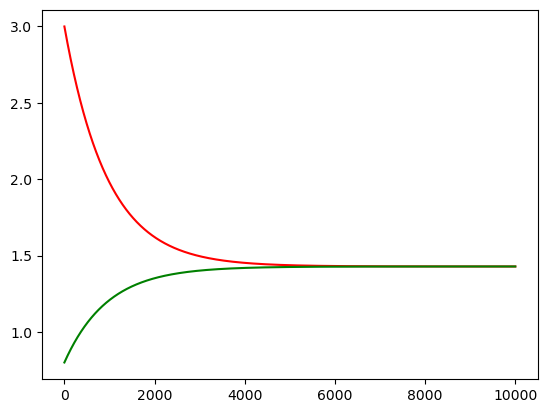

In [40]:
#%matplotlib
plt.plot(times,data1, color='red', linewidth=1.5)
plt.plot(times,data2, color='green', linewidth=1.5)
plt.show()


In [41]:
 data1[-1]*cont1['volume'] + data2[-1]*cont2['volume']

9.999999999999964

In [38]:
data1[-1]

1.4285714297581027

## Adding active diffusion.  I will arbitrarily say that this will pump  from container 2 in to container one.  Additionally, this will 

In [94]:
data1_act = np.zeros(len(times))
data2_act = np.zeros(len(times))
data1_act[0] = sol1/cont1['volume']
data2_act[0] = sol2/cont2['volume']
K2_1 = 0.008

for i in np.arange(1,len(times)):
    dt       = times[i]-times[i-1]
    f        = flux( data1_act[i-1] , data2_act[i-1] ) * dt * area_bw
    act_dif  = K2_1 * data2_act[i-1] * dt
    data1_act[i] =  -f/cont1['volume'] + act_dif*(cont2['volume']/cont1['volume']) + data1_act[i-1]
    data2_act[i] =  f/cont2['volume']  - act_dif + data2_act[i-1]

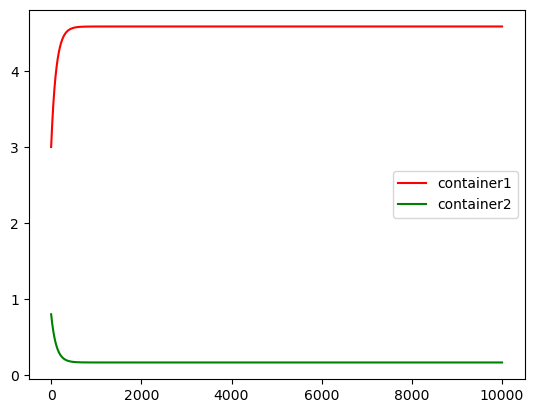

In [95]:
plt.plot(times,data1_act, color='red', linewidth=1.5, label='container1')
plt.plot(times,data2_act, color='green', linewidth=1.5,label='container2')
plt.legend()
plt.show()

In [75]:
 data1_act[-1]*cont1['volume'] + data2_act[-1]*cont2['volume']

9.999999999998966

In [76]:
print(data1_act[-1]*cont1['volume'] , data2_act[-1]*cont2['volume'])

8.936170212764935 1.0638297872340308


In [77]:
alpha = area_bw*d_sol/K2_1/dx

In [78]:
(alpha/cont1['volume']) * 1 / (1 + alpha * (cont1['volume']+cont2['volume'])/(cont1['volume']*cont2['volume'])   )  * sol0

1.0638297872340425

In [79]:
sol0 - (alpha/cont1['volume']) * 1 / (1 + alpha * (cont1['volume']+cont2['volume'])/(cont1['volume']*cont2['volume'])   )  * sol0

8.936170212765958